In [1]:

import numpy as np

In [2]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(10)

from DATA import MG17
from Reservoir import Reservoir

In [3]:
data = MG17(True, [90,0,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [4]:
from IPReservoir import IPReservoir
from ESN import EchoStateNetwork
from IPMask import IPMask
from Reservoir import Reservoir
from Metrics import *
from Evaluator import * 

In [5]:
N = 100
init_point = Reservoir(N=N, desired_rho=0.7, bias = False,)
names = ["Gaussian", "Bimodal", "Soft Trimodal", "Edgy Trimodal"]

masks = [
    IPMask.gaussian(N, std=0.2),
    IPMask.bimodal(N, mu=0.85, std=0.15),
    IPMask.trimodal(N, linear_rate=0.4, std_bim=0.18), 
    IPMask.trimodal(N, linear_rate=0.2, mu=0.85, std_bim=0.18)
    ]

models = [IPReservoir.clone(init_point) for _ in range(len(names))]

In [6]:
epochs = 10
eta = 0.0000025

In [7]:
models = [IPReservoir.clone(init_point) for _ in range(len(names))]
for mask,model in zip(masks, models): 
    model.set_IP_mask(mask, True)
    model.IP_online(X_TR, eta, epochs, eval_kl=X_TS)


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_uniform_distribution(model: IPReservoir, U: torch.Tensor, color=0, matching_zones=None):
    # Set Seaborn style and color palette
    sns.set_style("whitegrid")
    sns.set_palette("Set2")

    # Create figure and axes
    fig, ax = plt.subplots()

    model.reset_initial_state()
    model.warm_up(U, 100)
    X = model.predict(U)

    Y = torch.distributions.uniform(-1,1).sample()

    X = X.flatten().detach().numpy()
    Y = Y.flatten().detach().numpy()

    # Plot actual distribution
    sns.kdeplot(X, color=sns.color_palette("Set2")[color], linestyle="--", label="Actual Distribution", ax=ax)

    # Plot desired distribution
    sns.kdeplot(Y, color=sns.color_palette("Set2")[color], label="Desired Distribution", ax=ax)

    # Highlight matching zones if provided
    if matching_zones:
        for zone in matching_zones:
            ax.axvspan(zone[0], zone[1], alpha=0.3, color='gray')

    # Add legend
    ax.legend()

    # Show plot
    plt.show()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_distributions(model: IPReservoir, U: torch.Tensor, color=0, name='Desired', matching_zones=None):
    # Set Seaborn style and color palette
    sns.set_style("whitegrid")
    sns.set_palette("Set2")

    # Create figure and axes
    fig, ax = plt.subplots()

    model.reset_initial_state()
    model.warm_up(U, 100)
    X = model.predict(U)
    model.sample_targets(U.shape[0])
    Y = model.target_sample

    X = X.flatten().detach().numpy()
    Y = Y.flatten().detach().numpy()

    # Plot actual distribution with filled area
    sns.kdeplot(X, color=sns.color_palette("Set2")[color], label="Actual", ax=ax, fill=True, alpha=0.3,  hatch='///')

    # Plot desired distribution with filled area and constant color
    sns.kdeplot(Y, color='gray', linestyle="--", label=name, ax=ax, fill=True, alpha=0.3)

    # Calculate the area under the curve for X and Y
    area_x = np.trapz(np.sort(X), np.linspace(0, 1, len(X)))
    area_y = np.trapz(np.sort(Y), np.linspace(0, 1, len(Y)))

   
    # Highlight matching zones if provided
    if matching_zones:
        for zone in matching_zones:
            ax.axvspan(zone[0], zone[1], alpha=0.3, color='gray')

    # Add legend
    plt.xlabel('')
    plt.ylabel('')

    # Show plot
    plt.show()


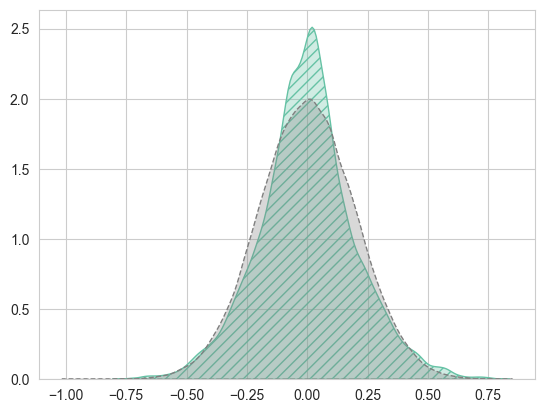

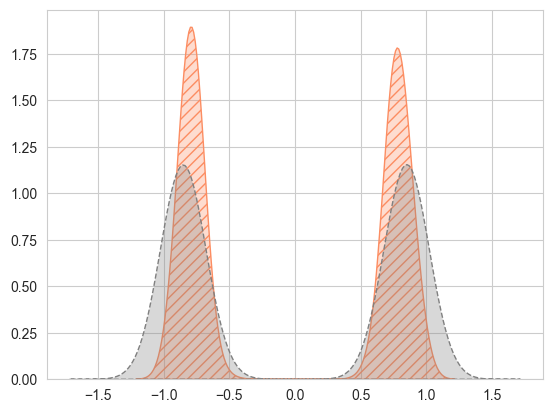

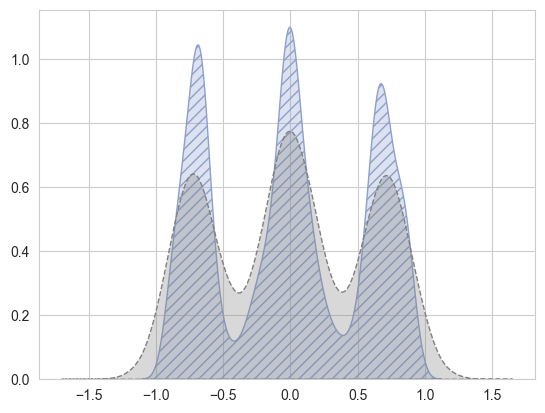

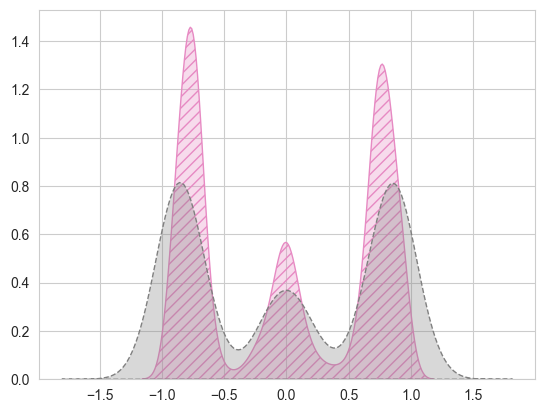

In [10]:
for idx,name in enumerate(names):
    plot_distributions(models[idx], X_TS, idx, name)

In [11]:
model.sample_targets(X_TS.shape[0])
Y = model.target_sample 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def plot_target_distribution(Y: np.ndarray, color='gray'):
    # Create figure and axes without any grid or detail
    fig, ax = plt.subplots()
    ax.axis('off')  # Turn off axes

    # Plot desired distribution as a colored line using kernel density estimation
    sns.kdeplot(Y, color=color, linewidth=2, fill=True,  hatch='///', alpha=0.5)

    # Show plot without grid and detail
    plt.show()


In [12]:
model

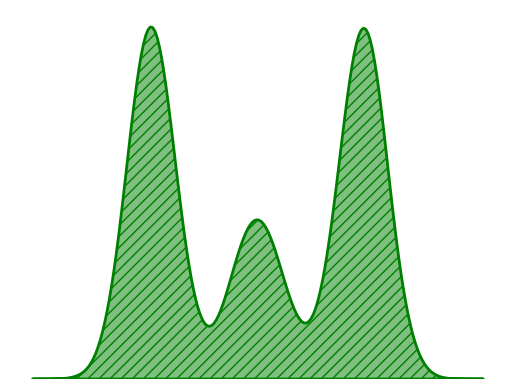

In [13]:
plot_target_distribution(Y.flatten().detach().numpy(), 'green')